In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [117]:
circuits_df = pd.read_csv('datasets/circuits.csv')
circuits_df.drop(columns=['circuitRef', 'name', 'lat', 'lng', 'alt', 'url'], inplace=True)
circuits_df.head(10)

,circuitId,location,country
0,1,Melbourne,Australia
1,2,Kuala Lumpur,Malaysia
2,3,Sakhir,Bahrain
3,4,Montmeló,Spain
4,5,Istanbul,Turkey
5,6,Monte-Carlo,Monaco
6,7,Montreal,Canada
7,8,Magny Cours,France
8,9,Silverstone,UK
9,10,Hockenheim,Germany


In [118]:
races_df = pd.read_csv('datasets/races.csv')
races_df.drop(columns=['round', 'name', 'date', 'time', 'url', 'fp1_date', 'fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time', 'quali_date', 'quali_time', 'sprint_date', 'sprint_time'], inplace=True)
races_df.head(10)

,raceId,year,circuitId
0,1,2009,1
1,2,2009,2
2,3,2009,17
3,4,2009,3
4,5,2009,4
5,6,2009,6
6,7,2009,5
7,8,2009,9
8,9,2009,20
9,10,2009,11


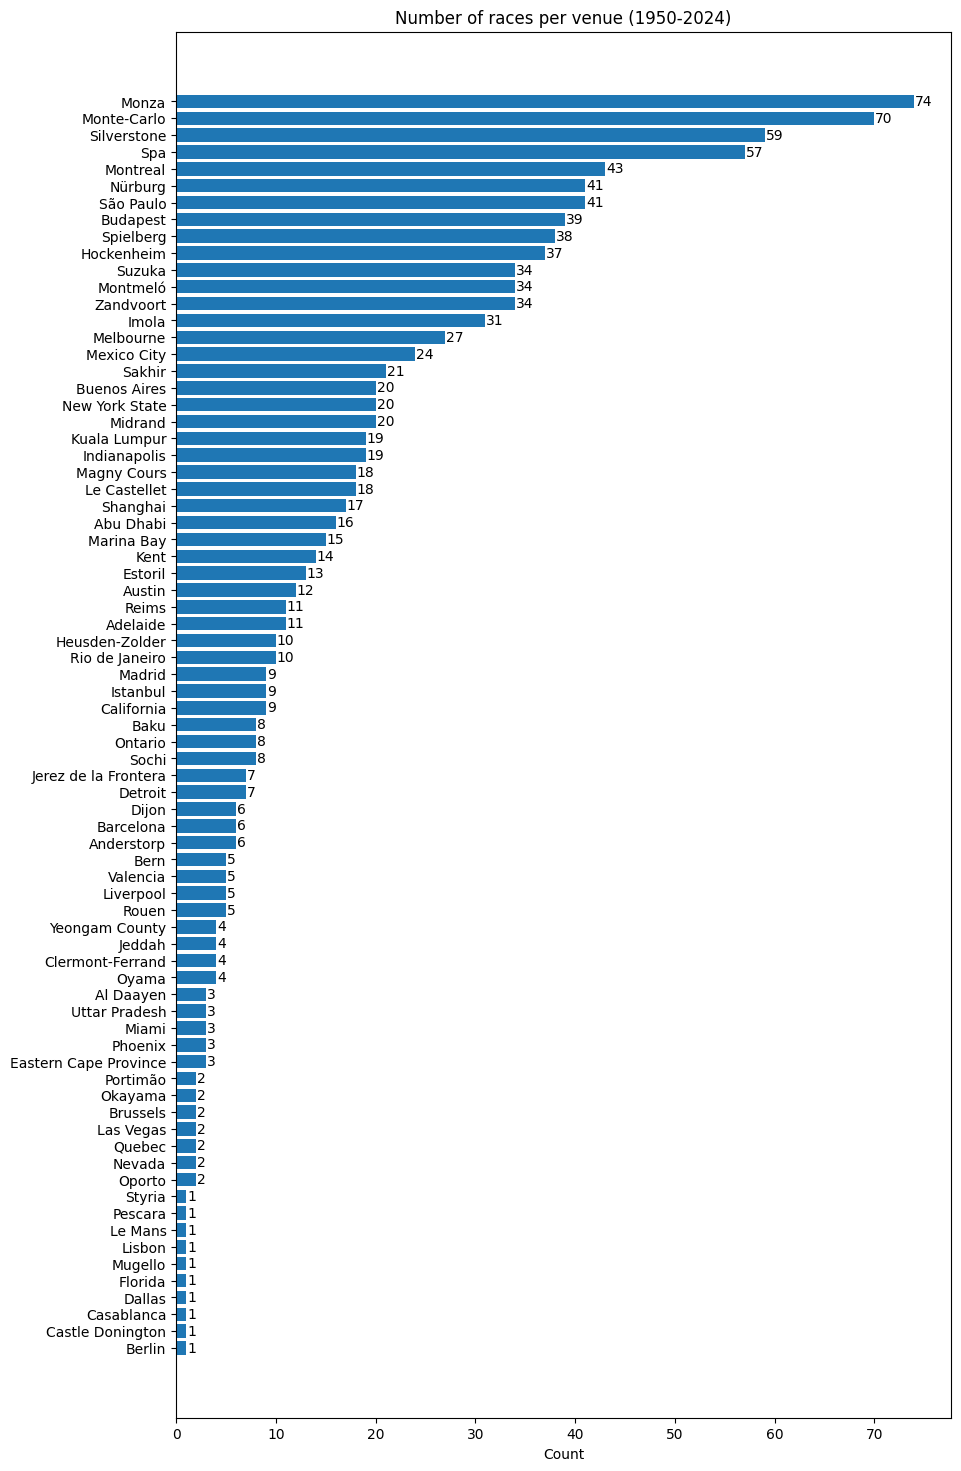

In [119]:
merge_df = pd.merge(circuits_df, races_df, on='circuitId')
race_locations_df = merge_df.groupby('location').size().reset_index(name='count').sort_values(by='count', ascending=True)

location = race_locations_df['location']
count = race_locations_df['count']

plt.figure(figsize=(10, 18))
bars = plt.barh(location, count)

for bar in bars:
    plt.text(
        bar.get_width() + 0.1,  # Position text slightly beyond the bar's end
        bar.get_y() + bar.get_height() / 2,  # Center text vertically on the bar
        str(int(bar.get_width())),  # Display the value
        va='center',  # Align vertically
        fontsize=10  # Font size
    )

plt.title('Number of races per venue (1950-2024)')
plt.xlabel('Count')
plt.show()

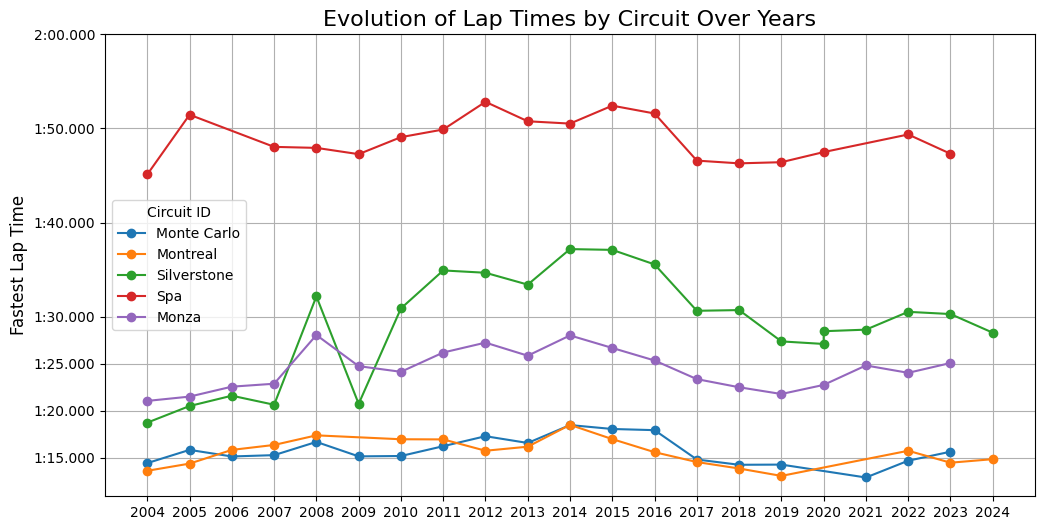

In [ ]:
results_df = pd.read_csv('datasets/results.csv')
results_df.drop(columns=['driverId','resultId', 'number', 'grid', 'position', 'constructorId', 'positionText', 'positionOrder', 'points', 'laps', 'time', 'milliseconds', 'fastestLap', 'fastestLapSpeed', 'statusId'], inplace=True)
best_ranked_laps = results_df[results_df['rank'] == '1']

top5_venues = location[-5:] # The 5 most frequent venues
top_5_circuit_id = circuits_df[circuits_df['location'].isin(top5_venues)]['circuitId'] # The IDs of these venues
top5_races = races_df[races_df['circuitId'].isin(top_5_circuit_id)].sort_values(by='circuitId') # All raceIds for races at the top 5 venues

merged_df = pd.merge(best_ranked_laps, top5_races, on='raceId')
merged_df.drop(columns=['raceId', 'rank'], inplace=True)
sorted_df = merged_df.sort_values(by=['circuitId', 'year'])

sorted_df['fastestLapTime'] = pd.to_timedelta('00:' + sorted_df['fastestLapTime']).dt.total_seconds()

circuit_names = circuits_df.loc[circuits_df['location'].isin(top5_venues), ['circuitId', 'location']]

merged_df = pd.merge(sorted_df, circuit_names, on='circuitId')

plt.figure(figsize=(12, 6))
for circuit_id, group in sorted_df.groupby('circuitId'):
    plt.plot(
        group['year'], 
        group['fastestLapTime'], 
        marker='o', 
        label=f'Circuit {circuit_id}'
    )

yticks_seconds = [75, 80, 85, 90, 100, 110, 120] 
yticks_labels = ['1:15.000', '1:20.000', '1:25.000', '1:30.000', '1:40.000', '1:50.000', '2:00.000']
plt.yticks(yticks_seconds, yticks_labels)

xticks_years = sorted(sorted_df['year'].unique()) 
plt.xticks(xticks_years)

plt.title('Evolution of Lap Times by Circuit Over Years', fontsize=16)
plt.ylabel('Fastest Lap Time', fontsize=12)
plt.legend([
    'Monte Carlo', 'Montreal', 'Silverstone', 'Spa', 'Monza'
    ],title='Circuit', fontsize=10)
plt.grid(True)
plt.show()